1.**Read** the CSV file. **(Employee Data CSV)**

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('employee_data - employee_data.csv')
df

,EmployeeID,Name,Department,Salary,JoinDate,Email,Age,PerformanceScore,ProjectCount
0,108,Diana,Sales,41733.35,2019-04-18,diana108@example.com,55.0,Excellent,1.0
1,16,Evan,IT,87037.76,2019-01-16,evan16@example.com,31.0,Poor,6.0
2,951,Charlie,Finance,89898.73,2021-08-08,charlie951@example.com,32.0,Poor,9.0
3,239,Charlie,HR,80130.55,2019-08-27,charlie239@example.com,24.0,Poor,6.0
4,516,Charlie,Marketing,36887.70,2020-05-30,charlie516@example.com,34.0,Average,3.0
...,...,...,...,...,...,...,...,...,...
1045,814,Diana,Sales,93430.03,2021-03-24,diana814@example.com,37.0,Good,6.0
1046,12,George,IT,90967.84,2019-01-12,george12@example.com,37.0,Poor,6.0
1047,698,Bob,Sales,41123.57,2020-11-28,bob698@example.com,22.0,Good,4.0
1048,61,Charlie,HR,64066.83,2019-03-02,charlie61@example.com,23.0,Good,5.0


2.What are the **data types** of each column? if there is a **need** of **change** the **data type** then **change** the **data type**.

In [161]:
df.dtypes

EmployeeID            int64
Name                 object
Department           object
Salary              float64
JoinDate             object
Email                object
Age                 float64
PerformanceScore     object
ProjectCount        float64
dtype: object

In [162]:
# a=lambda x: str(x).split(',')
df['Name'] = df['Name'].astype('string')
df['Department'] = df['Department'].astype('string')
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['Email'] = df['Email'].astype('string')
df['PerformanceScore'] = df['PerformanceScore'].astype('string')
df.dtypes

EmployeeID                   int64
Name                        string
Department                  string
Salary                     float64
JoinDate            datetime64[ns]
Email                       string
Age                        float64
PerformanceScore            string
ProjectCount               float64
dtype: object

3.Are there any **missing values** in the **dataset**? If yes, **how** would you **handle** them?

In [163]:
df.isnull().sum()

EmployeeID           0
Name                 0
Department          55
Salary              53
JoinDate             0
Email               50
Age                 50
PerformanceScore    50
ProjectCount        50
dtype: int64

In [164]:
df['Department']=df['Department'].fillna(df['Department'].mode()[0])
df['Salary']=df['Salary'].fillna(df['Salary'].mode()[0])
df['Email']=df['Email'].fillna(df['Email'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['PerformanceScore']=df['PerformanceScore'].fillna(df['PerformanceScore'].mode()[0])
df['ProjectCount']=df['ProjectCount'].fillna(df['ProjectCount'].mode()[0])

df.isnull().sum()

EmployeeID          0
Name                0
Department          0
Salary              0
JoinDate            0
Email               0
Age                 0
PerformanceScore    0
ProjectCount        0
dtype: int64

4.Explore **unique** values in the **'Age'** column?

In [165]:
df.Age

0       55.0
1       31.0
2       32.0
3       24.0
4       34.0
        ... 
1045    37.0
1046    37.0
1047    22.0
1048    23.0
1049    47.0
Name: Age, Length: 1050, dtype: float64

In [166]:
df['Age'].unique()

array([55., 31., 32., 24., 34., 36., 52., 45., 28., 25., 46., 56., 57.,
       49., 26., 21., 53., 42., 48., 44., 41., 20., 23., 35., 29., 37.,
       22., 58., 50., 38., 54., 43., 51., 30., 33., 47., 39., 27., 59.,
       40.])

5.Check for **duplicates** in the **dataset**? if **duplicates** present drop those **duplicates**

In [167]:
dup = df.duplicated().sum()


In [168]:
if dup>0:
  df.drop_duplicates()
  print("Jon done")
else:
  print("This dataset have no duplicates values")

This dataset have no duplicates values


6.What is the **average age** and **salary** by **department**?

In [169]:
avg_age = df.groupby('Department').agg({'Age':'mean','Salary':'mean'})

In [170]:
avg_age

,Age,Salary
Department,,
Finance,38.901961,65416.380392
HR,38.855019,61110.397546
IT,38.424242,63677.067828
Marketing,38.068966,64395.064828
Sales,39.034146,64979.869268


7.How does **project count** relate to **performance score**?

In [171]:
df

,EmployeeID,Name,Department,Salary,JoinDate,Email,Age,PerformanceScore,ProjectCount
0,108,Diana,Sales,41733.35,2019-04-18,diana108@example.com,55.0,Excellent,1.0
1,16,Evan,IT,87037.76,2019-01-16,evan16@example.com,31.0,Poor,6.0
2,951,Charlie,Finance,89898.73,2021-08-08,charlie951@example.com,32.0,Poor,9.0
3,239,Charlie,HR,80130.55,2019-08-27,charlie239@example.com,24.0,Poor,6.0
4,516,Charlie,Marketing,36887.70,2020-05-30,charlie516@example.com,34.0,Average,3.0
...,...,...,...,...,...,...,...,...,...
1045,814,Diana,Sales,93430.03,2021-03-24,diana814@example.com,37.0,Good,6.0
1046,12,George,IT,90967.84,2019-01-12,george12@example.com,37.0,Poor,6.0
1047,698,Bob,Sales,41123.57,2020-11-28,bob698@example.com,22.0,Good,4.0
1048,61,Charlie,HR,64066.83,2019-03-02,charlie61@example.com,23.0,Good,5.0


In [172]:
statistics = df.groupby('PerformanceScore')['ProjectCount'].describe()
statistics

,count,mean,std,min,25%,50%,75%,max
PerformanceScore,,,,,,,,
Average,256.0,5.015625,2.644964,1.0,3.00,5.0,7.0,9.0
Excellent,238.0,4.983193,2.723497,1.0,2.00,5.0,7.0,9.0
Good,246.0,4.971545,2.679324,1.0,2.25,5.0,7.0,9.0
Poor,310.0,4.296774,2.870843,1.0,1.00,4.0,7.0,9.0


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

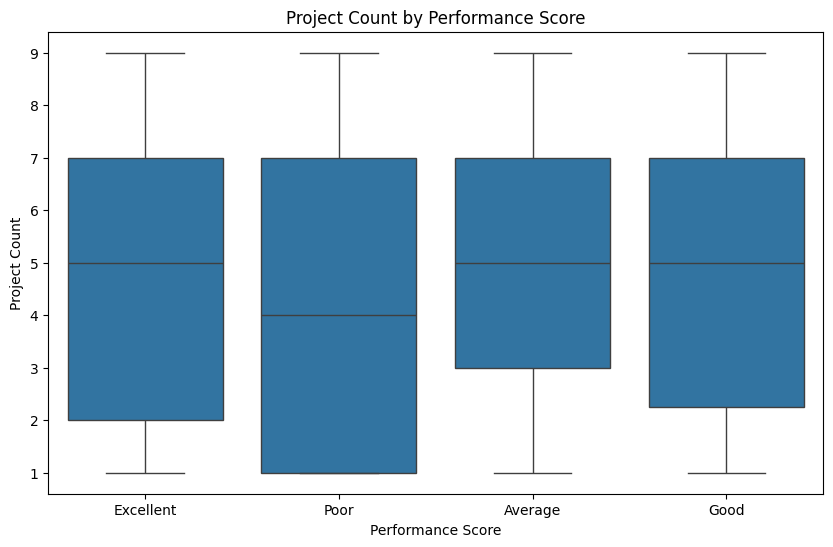

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='ProjectCount', data=df)
plt.title('Project Count by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Project Count')
plt.show()

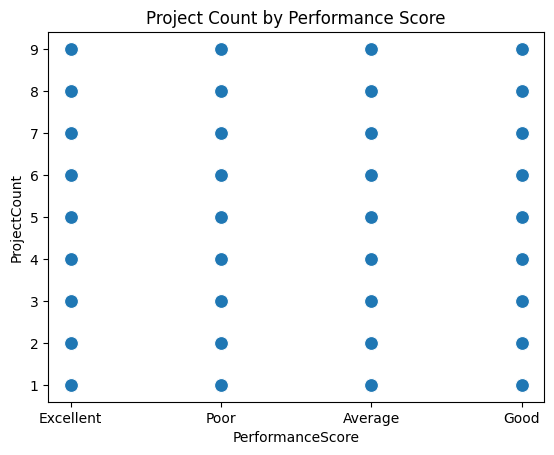

In [175]:
plt.title('Project Count by Performance Score')
sns.scatterplot(x='PerformanceScore', y='ProjectCount', s=100, data=df);

8.Create a **box plot** using **seaborn** to show the **distribution of salaries** across different **performance scores**?

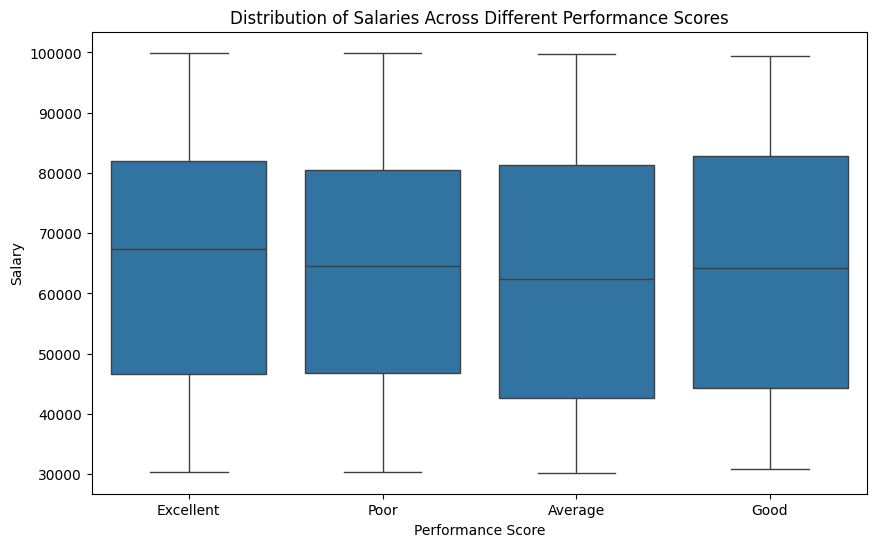

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Salary', data=df)
plt.title('Distribution of Salaries Across Different Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.show()

9.Create a **bar plot** the show the **count** of **employees** in each **department**?

In [177]:
df

,EmployeeID,Name,Department,Salary,JoinDate,Email,Age,PerformanceScore,ProjectCount
0,108,Diana,Sales,41733.35,2019-04-18,diana108@example.com,55.0,Excellent,1.0
1,16,Evan,IT,87037.76,2019-01-16,evan16@example.com,31.0,Poor,6.0
2,951,Charlie,Finance,89898.73,2021-08-08,charlie951@example.com,32.0,Poor,9.0
3,239,Charlie,HR,80130.55,2019-08-27,charlie239@example.com,24.0,Poor,6.0
4,516,Charlie,Marketing,36887.70,2020-05-30,charlie516@example.com,34.0,Average,3.0
...,...,...,...,...,...,...,...,...,...
1045,814,Diana,Sales,93430.03,2021-03-24,diana814@example.com,37.0,Good,6.0
1046,12,George,IT,90967.84,2019-01-12,george12@example.com,37.0,Poor,6.0
1047,698,Bob,Sales,41123.57,2020-11-28,bob698@example.com,22.0,Good,4.0
1048,61,Charlie,HR,64066.83,2019-03-02,charlie61@example.com,23.0,Good,5.0


In [178]:
count = df['Department'].value_counts()
count

HR           269
Sales        205
Finance      204
IT           198
Marketing    174
Name: Department, dtype: Int64

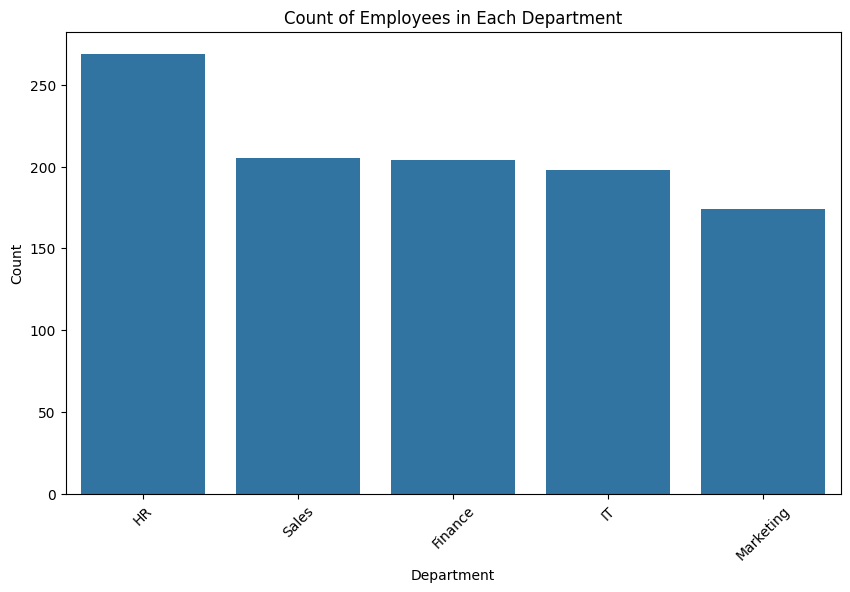

In [179]:
plt.figure(figsize=(10, 6))
sns.barplot(x=count.index, y=count.values)
plt.title('Count of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

10.Create a **scatter plot** using **plotly** to explore the relationship between **age** and **salary**, **colored** by **department**?

In [180]:
import plotly.express as px
fig = px.scatter(df, x='Age', y='Salary', color='Department', title='Relationship between Age and Salary')

In [181]:
fig.show()

11.Plot a **histogram** using **matplotlib** of **employees' ages** to understand the **age distribution** within the company?

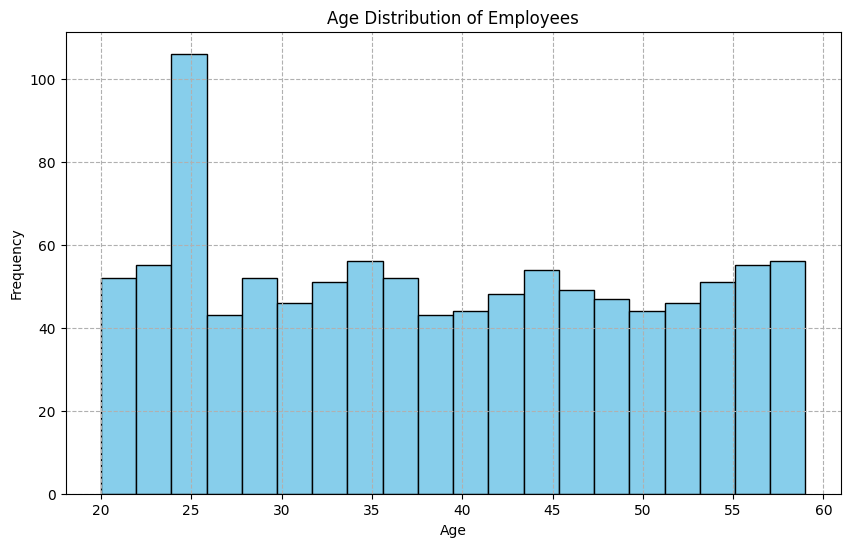

In [182]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(linestyle='--')
plt.show()

12.Use **Plotly** to create an interactive **pie chart** showing the **proportion** of **employees** in **each department**?

In [183]:
proportion = df['Department'].value_counts()
proportion

HR           269
Sales        205
Finance      204
IT           198
Marketing    174
Name: Department, dtype: Int64

In [184]:
fix = px.pie(names=proportion.index, values=proportion.values, title='Proportion of Employees in Each Department')
fix.show()